# Practica 1: Aprendizaje automatico
## Parte 1: Agrupamiento o clustering

Grupo Lab: 06 <br>
Daniel Alfaro Miranda e Ismail Azizi Gonzalez

### Conjunto de datos: Causas de Arresto en USA
El conjunto describe para cada estado el número de arrestos por asesinato, asalto y violación por cada 100.000 habitantes.<br> El objetivo del análisis es determinar que estados son similares en cuanto a causas de arrestos y cuales son estas causas que  los unen.

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer="USArrests.csv", index_col=0) 
df = df.drop(['UrbanPop'], axis=1)

print('Tipos de las variables:')
pd.DataFrame({k: [v.name] for k, v in df.dtypes.to_dict().items()}, columns=df.columns.to_list(), index=['Types'])

Tipos de las variables:


,Murder,Assault,Rape
Types,float64,int64,float64


In [23]:
print('Estadísticos descriptivos:')
df.describe().transpose()

Estadísticos descriptivos:


,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


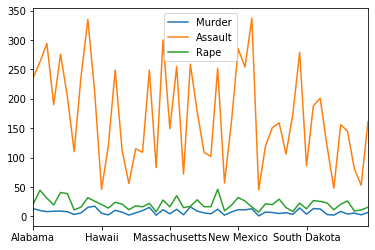

In [4]:
df.plot()

### Conclusiones:
Como se puede ver en la gráfica, las variables tienen cierta correlación lineal, las representaciones se ajustan pero con diferente escala. Se puede deducir que en la mayoria de los estados, las causas de arresto suelen ser directamente proporcionales entre si, siendo mas frecuente siempre la de arresto por asalto.
<br>Otra cararterística a destacar es que el asalto tiene bastante más desviación con respecto a la media en comparación con las demás variables, en las cuales las cifras de arresto son mas estables entre estados. En general todos los estados tienen el mismo grado de violaciones y asesinato, pero en cuanto al asalto varía mucho entre ellos.

### Reescalado de variables:
En este problema tiene sentido reescalar las variables, puesto que parecen tener la misma distribución y todas tienen el mismo peso en cuanto a la clasificación. 
<br> Como tipo de escalado usaremos una estandarización, que mantendrá mejor la distribución estadística en las variables. 

In [5]:
from sklearn.preprocessing import StandardScaler

data = df.values

scaler = StandardScaler()
scaledData = scaler.fit_transform(data)


df2 = pd.DataFrame(data=scaledData, columns=df.columns.to_list(), index=df.index)
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,-8.437695e-17,1.010153,-1.620693,-0.861138,-0.124776,0.802925,2.229265
Assault,50.0,1.298961e-16,1.010153,-1.524362,-0.748605,-0.142545,0.948363,2.015028
Rape,50.0,8.326673e-16,1.010153,-1.502548,-0.664025,-0.122085,0.533096,2.671197


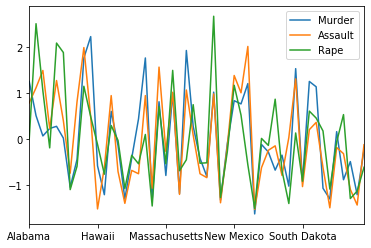

In [6]:
df2.plot()

### Clustering:
Se aplicara el algoritmo de clustering de k-medias

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

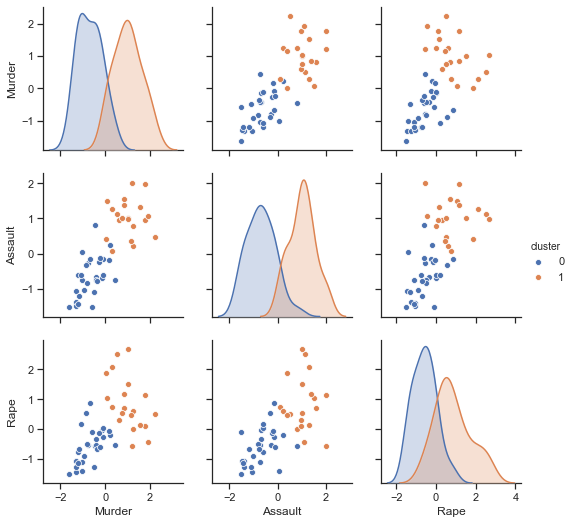

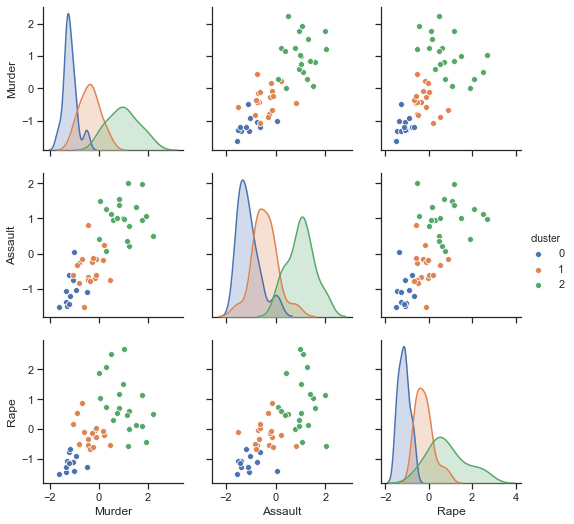

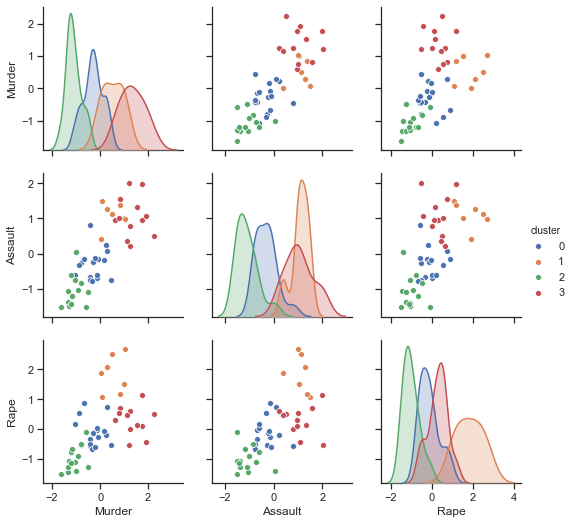

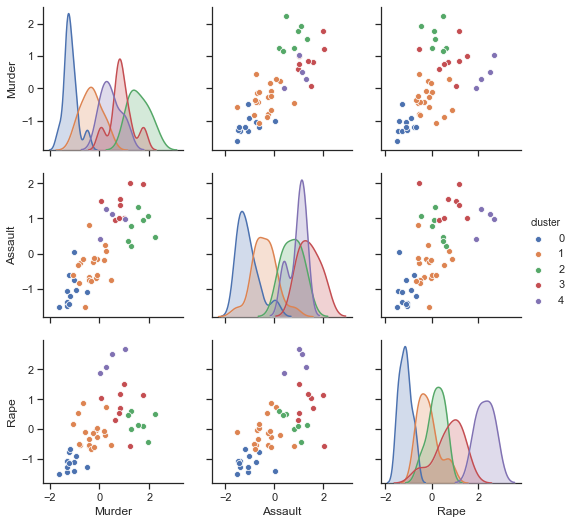

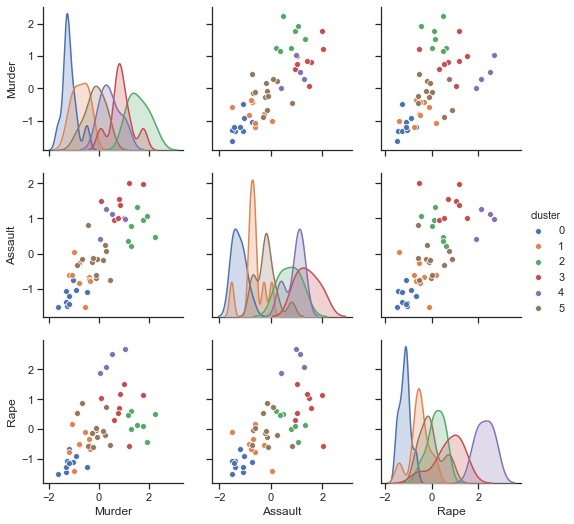

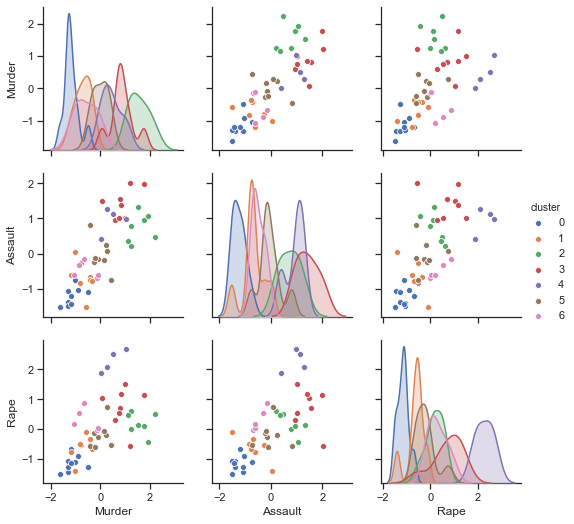

In [8]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
clusterDf = df2.copy()
sns.set(style="ticks")
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(scaledData)

    clusterDf['cluster'] =km.labels_
    sns.pairplot(clusterDf, hue="cluster", x_vars=df2.columns, y_vars=df2.columns)
     
    
    davies_boulding[k-2] = davies_bouldin_score(scaledData, km.labels_) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

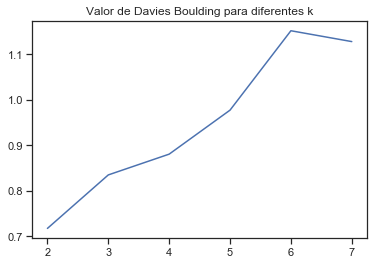

In [9]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

### Elección del número de clusters:

Como se puede observar en las gráficas, la relación entre las distintas causas de arrestos es casi lineal. 
<br>
De entre las K particiones el mejor valor, que hace mas compacta nuestra representación (índice Davies-Boulding), es para 2 particiones. Además en las gráficas de densidad para dos particiones, la mayoría de estados quedan agrupados en una u otra clase, sin interferir los clusters demasiado entre si. Para otras, cada partición es mas específica y tiene más rangos conflictivos para cada variable. La que más se confunde para dos particiones es la de violación, con la densidad de clases mezclada en un ámplio rango central. 
La elección de 3 particiones también podría ser válida, no aumenta demasiado el índice ni se pierde mucha generalidad. Dependiendo de la interpretación podría ser también buena elección.

### Solución para dos clusters:

Danger               High         Low
Murder  count   20.000000   30.000000
        mean    12.165000    4.870000
        std      2.684904    2.304291
        min      7.900000    0.800000
        25%     10.300000    2.825000
        50%     12.150000    4.650000
        75%     13.500000    6.525000
        max     17.400000    9.700000
Assault count   20.000000   30.000000
        mean   255.250000  114.433333
        std     44.116920   47.481890
        min    178.000000   45.000000
        25%    229.750000   81.500000
        50%    254.500000  111.500000
        75%    280.500000  150.500000
        max    337.000000  238.000000
Rape    count   20.000000   30.000000
        mean    29.165000   15.943333
        std      8.386473    5.460370
        min     16.100000    7.300000
        25%     23.625000   11.225000
        50%     27.350000   16.050000
        75%     32.850000   19.875000
        max     46.000000   29.300000

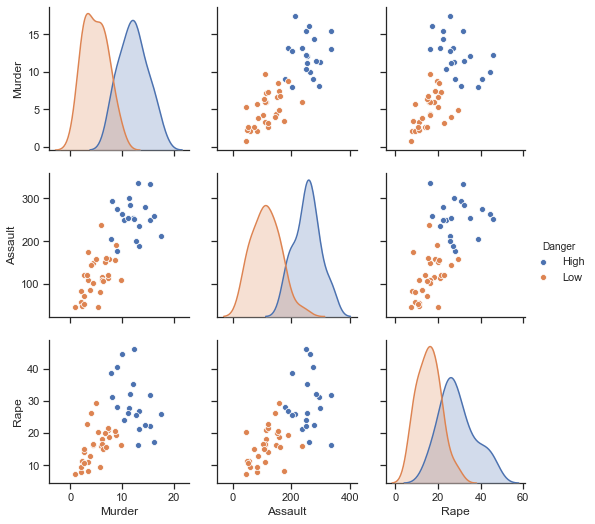

In [10]:
km = KMeans(init='random', n_clusters=2, random_state=333)
km.fit(scaledData)

solDf = df.copy()
#clusterDf['cluster'] =km.labels_
#clusterDf['cluster'] = clusterDf['cluster'].map({0 : "Bajo riesgo", 1 : "Alto riesgo"})
#sns.pairplot(clusterDf, hue="cluster", x_vars=df2.columns, y_vars=df2.columns)
#clusterDf.groupby(["cluster"]).describe().transpose()
solDf['Danger'] =km.labels_
solDf['Danger'] = solDf['Danger'].map({0 : "Low", 1 : "High"})
sns.pairplot(solDf, hue="Danger", x_vars=df.columns, y_vars=df.columns)
solDf.groupby(["Danger"]).describe().transpose()

Los dos clusters se pueden interpretar como el nivel de peligrosidad del estado, en alto o bajo.
<br>A los 3 tipos de arresto se les da la misma importancia para el cálculo de pertenencia al cluster, por el reescalado, pero los datos se muestran en su escala original ya clasificados por peligrosidad.
<br> Si no se hubieran reescalado los datos, el número de asaltos enmascararía la información de las demas variables, al ser valores muy altos en comparación con las demás, y la pertenencia a peligrosidad alta o baja vendría condicionada por esta en su mayoría.

In [12]:
print("Clasificación de estados por peligrosidad:")
solDf

Clasificación de estados por peligrosidad:


,Murder,Assault,Rape,Danger
Alabama,13.2,236,21.2,High
Alaska,10.0,263,44.5,High
Arizona,8.1,294,31.0,High
Arkansas,8.8,190,19.5,Low
California,9.0,276,40.6,High
Colorado,7.9,204,38.7,High
Connecticut,3.3,110,11.1,Low
Delaware,5.9,238,15.8,Low
Florida,15.4,335,31.9,High
Georgia,17.4,211,25.8,High


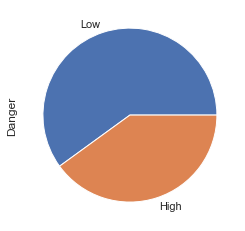

In [22]:
solDf['Danger'].value_counts().plot.pie()

Como alternativa se podrían haber usado 3 particiones, que identificarían la peligrosidad en alto, medio, bajo, lo cual también sería una solución bastante aceptable.